<a href="https://colab.research.google.com/github/broistg/CV-Project-1_Nhom-18/blob/main/CV_Project_1_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.&nbsp;Hướng dẫn sử dụng

Notebook này minh họa kết quả thực nghiệm cho bài tập lớn số 1, bao gồm:
1. Chuyển đổi không gian màu và thao tác kênh ảnh.
2. Áp dụng các bộ lọc làm trơn (Low-pass) và tách biên (High-pass).

Hướng dẫn chạy: Nhấn nút `Run all` để chạy toàn bộ dự án.

# 1.&nbsp;Cài đặt thư viện và chuẩn bị dữ liệu

In [1]:
import os
import sys

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GITHUB_USER = "broistg"
REPO_NAME = "CV-Project-1_Nhom-18"
REPO_URL = f"https://github.com/{GITHUB_USER}/{REPO_NAME}.git"
INPUT_DIR = "data/input"
OUTPUT_DIR = "data/output"

# Clone Repository
if not os.path.exists(REPO_NAME):
    !git clone $REPO_URL
# Thiết lập thư mục làm việc
if os.path.basename(os.getcwd()) != REPO_NAME:
    os.chdir(REPO_NAME)
# Thêm thư mục hiện tại vào System Path
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

# Import module tự viết
try:
    from src import color_ops       # Xử lý màu (Part 1)
    from src import spatial_filters # Xử lý bộ lọc (Part 2)
    from src import utils           # Hàm hỗ trợ hiển thị
except ImportError as e:
    print(f"❌ Lỗi Import: {e}")

Cloning into 'CV-Project-1_Nhom-18'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 4.42 KiB | 4.42 MiB/s, done.
❌ Lỗi Import: No module named 'src'


Hàm hỗ trợ hiển thị ảnh

In [3]:
def show_image(img, title="Image", cmap_type='gray'):
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

def show_comparison(img_original, img_filtered, title_a="Original", title_b="Filtered"):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    show_image(img_original, title_a)
    plt.subplot(1, 2, 2)
    show_image(img_filtered, title_b)
    plt.show()

# 2.&nbsp;Biểu diễn ảnh màu & Ảnh xám

## 2.1&nbsp;Chuyển đổi RGB sang Grayscale

Chúng ta sử dụng công thức chuyển đổi chuẩn: $Y = 0.299R + 0.587G + 0.114B$

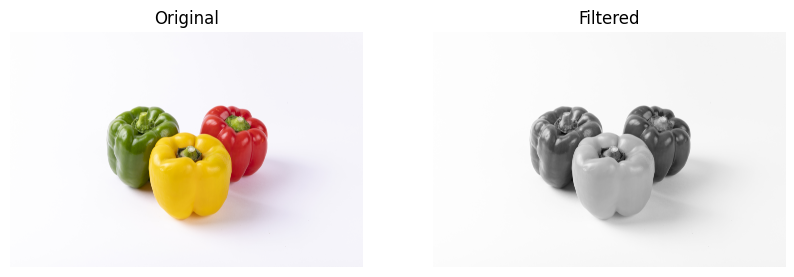

In [5]:
img_name = "rgb_peppers.jpg"
img_path = os.path.join(INPUT_DIR, img_name)

img_rgb = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
# img_gray = color_ops.rgb_to_grayscale(img_rgb)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

show_comparison(img_rgb, img_gray)

## 2.2&nbsp;Tách và Trộn kênh màu

Phân tách ảnh thành 3 kênh riêng biệt R, G, B để quan sát sự phân bố cường độ sáng.

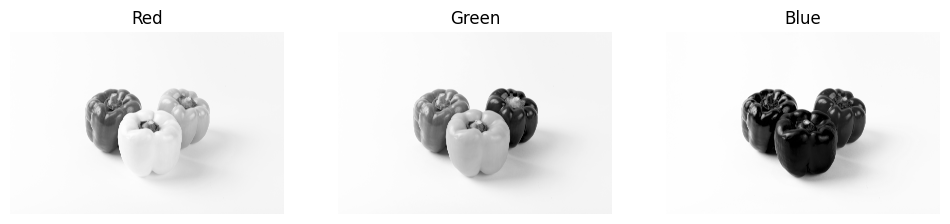

In [8]:
R = img_rgb[:,:,0]
G = img_rgb[:,:,1]
B = img_rgb[:,:,2]

# Hiển thị 3 kênh
fig, axs = plt.subplots(1,3, figsize=(12,4))
axs[0].imshow(R, cmap='gray'); axs[0].set_title('Red')
axs[1].imshow(G, cmap='gray'); axs[1].set_title('Green')
axs[2].imshow(B, cmap='gray'); axs[2].set_title('Blue')
for ax in axs: ax.axis('off')

Thử nghiệm:
* Tái tạo lại hình ảnh gốc từ các kênh R, G, B riêng biệt.
* Hoán đổi kênh R và B (Tạo hiệu ứng màu lạ).
* Thay thế kênh màu đỏ (R) đã được thay thế bằng kênh màu xanh lá cây (G)
* Loại bỏ kênh màu đỏ (R): đặt về 0.

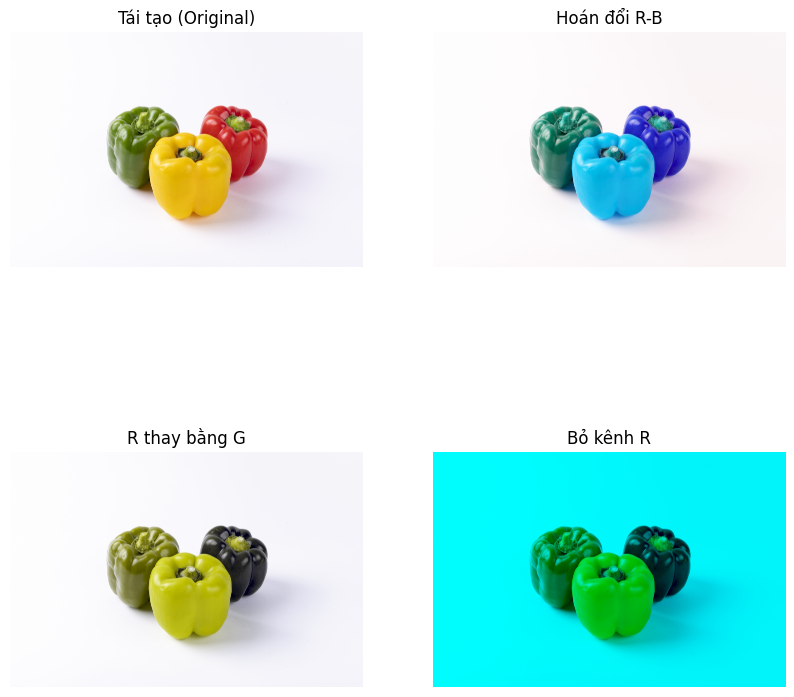

In [17]:
reconstructed = np.stack([R, G, B], axis=2)
swap_rb = np.stack([B, G, R], axis=2)

# New examples
red_replaced_by_green = np.stack([G, G, B], axis=2) # Replace Red with Green
red_channel_removed = np.stack([np.zeros_like(R), G, B], axis=2) # Remove Red channel

fig, axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].imshow(reconstructed); axs[0,0].set_title('Tái tạo (Original)')
axs[0,1].imshow(swap_rb); axs[0,1].set_title('Hoán đổi R-B')
axs[1,0].imshow(red_replaced_by_green); axs[1,0].set_title('R thay bằng G')
axs[1,1].imshow(red_channel_removed); axs[1,1].set_title('Bỏ kênh R')
for ax_row in axs:
    for ax in ax_row:
        ax.axis('off')

# 4.&nbsp;Lọc ảnh


## 4.1.&nbsp;Khử nhiễu Muối tiêu (Salt & Pepper Noise)
**Mục tiêu:** So sánh khả năng làm trơn của Mean Filter và Gaussian Filter trên loại nhiễu hạt rời rạc.

## 4.2.&nbsp;Tách biên trên ảnh độ tương phản thấp

**Mục tiêu:** Kiểm tra độ nhạy của bộ lọc High-pass (Sobel) khi ảnh đầu vào bị mờ sương hoặc thiếu sáng.

In [ ]:
kernel_sobel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

kernel_sobel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

In [ ]:
img_name = "new_real_hazy_0085_real_B.png"
img_path = os.path.join(INPUT_DIR, img_name)

img_rgb = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
# img_gray = color_ops.rgb_to_grayscale(img_rgb)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

show_comparison(img_rgb, img_gray)

img_gray.shape

In [ ]:
from src.spatial_filters import convolution2D, normalization

sobel_x = convolution2D(img_gray, kernel_sobel_x)
sobel_y = convolution2D(img_gray, kernel_sobel_y)
sobel_xy = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot gray
axs[0, 0].imshow(img_gray, cmap='gray')
axs[0, 0].set_title('Grayscale Image')
axs[0, 0].axis('off')

# Plot sobel_x
axs[0, 1].imshow(normalization(sobel_x), cmap='gray')
axs[0, 1].set_title('Sobel X-gradient')
axs[0, 1].axis('off')

# Plot sobel_y
axs[1, 0].imshow(normalization(sobel_y), cmap='gray')
axs[1, 0].set_title('Sobel Y-gradient')
axs[1, 0].axis('off')

# Plot sobel_xy
axs[1, 1].imshow(normalization(sobel_xy), cmap='gray')
axs[1, 1].set_title('Sobel Gradient Magnitude')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

## 4.3.&nbsp;Ứng dụng Y tế & Làm nét ảnh

**Mục tiêu:** Sử dụng **Laplacian** để làm nổi bật các chi tiết nhỏ (ví dụ: vết nứt xương, vân phổi) trong ảnh y tế hoặc ảnh có nhiều chi tiết.

In [ ]:
kernel_laplacian_4_nb = np.array([[0, 1, 0],
                               [1, -4, 1],
                               [0, 1, 0]])

kernel_laplacian_8_nb = np.array([[-1, -1, -1],
                                  [-1, 8, -1],
                                  [-1, -1, -1]])

kernel_laplacian_of_gaussian = np.array([[0, 0, -1, 0, 0],
                                         [0, -1, -2, -1, 0],
                                         [-1, -2, 16, -2, -1],
                                         [0, -1, -2, -1, 0],
                                         [0, 0, -1, 0, 0]])

In [ ]:
img_name = "house.tiff"
img_path = os.path.join(INPUT_DIR, img_name)

img_rgb = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
# img_gray = color_ops.rgb_to_grayscale(img_rgb)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

show_comparison(img_rgb, img_gray)

In [ ]:
img_laplacian_4_nb = convolution2D(img_gray, kernel_laplacian_4_nb)
img_laplacian_8_nb = convolution2D(img_gray, kernel_laplacian_8_nb)
img_laplacian_of_gaussian = convolution2D(img_gray, kernel_laplacian_of_gaussian)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot img_gray
axs[0, 0].imshow(img_gray, cmap='gray')
axs[0, 0].set_title('Grayscale Image')
axs[0, 0].axis('off')

# Plot img_laplacian_4_nb
axs[0, 1].imshow(normalization(np.abs(img_laplacian_4_nb)), cmap='gray')
axs[0, 1].set_title('Laplacian 4-neighbor')
axs[0, 1].axis('off')

# Plot img_laplacian_8_nb
axs[1, 0].imshow(normalization(np.abs(img_laplacian_8_nb)), cmap='gray')
axs[1, 0].set_title('Laplacian 8-neighbor')
axs[1, 0].axis('off')

# Plot img_laplacian_of_gaussian
axs[1, 1].imshow(normalization(np.abs(img_laplacian_of_gaussian)), cmap='gray')
axs[1, 1].set_title('Laplacian of Gaussian')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

# 5.&nbsp;Demo Tương tác

Thay đổi tham số `kernel_size` trực tiếp để xem ảnh hưởng của độ mờ.

# 6.&nbsp;Kết luận
- **Low-pass:** Hiệu quả trong việc giảm nhiễu Gaussian nhưng làm mờ biên. Với nhiễu muối tiêu (Phần 4.1), Mean/Gaussian chưa tối ưu.
- **High-pass:** Sobel và Laplacian rất mạnh trong việc tìm biên, nhưng cực kỳ nhạy cảm với nhiễu và độ tương phản thấp (Phần 4.2).
- **Ứng dụng:** Kết hợp High-pass vào ảnh gốc giúp tăng độ nét hiệu quả cho ảnh y tế (Phần 4.3).